In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

### Output Interpretation
* EOFs: The EOFs represent the spatial patterns of variability. In this synthetic example, they are the dominant modes of variation in the SST, SLP, and wind speed data.
* PCs: The PCs are the time series associated with each EOF, showing how the strength of these patterns varies over time.
* Variance Explained: This shows the proportion of total variance captured by each EOF.

In [18]:
# Generate synthetic data for SST, SLP, and Wind Speed
np.random.seed(42)
time = np.arange(100)  # 100 time steps

# Create synthetic patterns with some noise
sst = np.sin(2 * np.pi * time / 50) + 0.1 * np.random.randn(100)  # SST pattern with some noise
slp = np.cos(2 * np.pi * time / 50) + 0.1 * np.random.randn(100)  # SLP pattern with some noise
wind_speed = np.sin(2 * np.pi * time / 25) + 0.1 * np.random.randn(100)  # Wind Speed pattern with some noise

# Combine the data into a multivariate dataset
data = np.vstack([sst, slp, wind_speed])

# Standardize the data (zero mean and unit variance)
data_mean = np.mean(data, axis=1).reshape(-1, 1)
data_std = np.std(data, axis=1).reshape(-1, 1)
data_standardized = (data - data_mean) / data_std

In [19]:
# Compute the covariance matrix
cov_matrix = np.cov(data_standardized)

# Perform Singular Value Decomposition (SVD)
U, s, Vt = svd(cov_matrix)

# EOFs (principal components)
eofs = U

# PCs (time series of the principal components)
pcs = np.dot(eofs.T, data_standardized)

# Variance explained by each EOF
variance_explained = s / np.sum(s) * 100

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


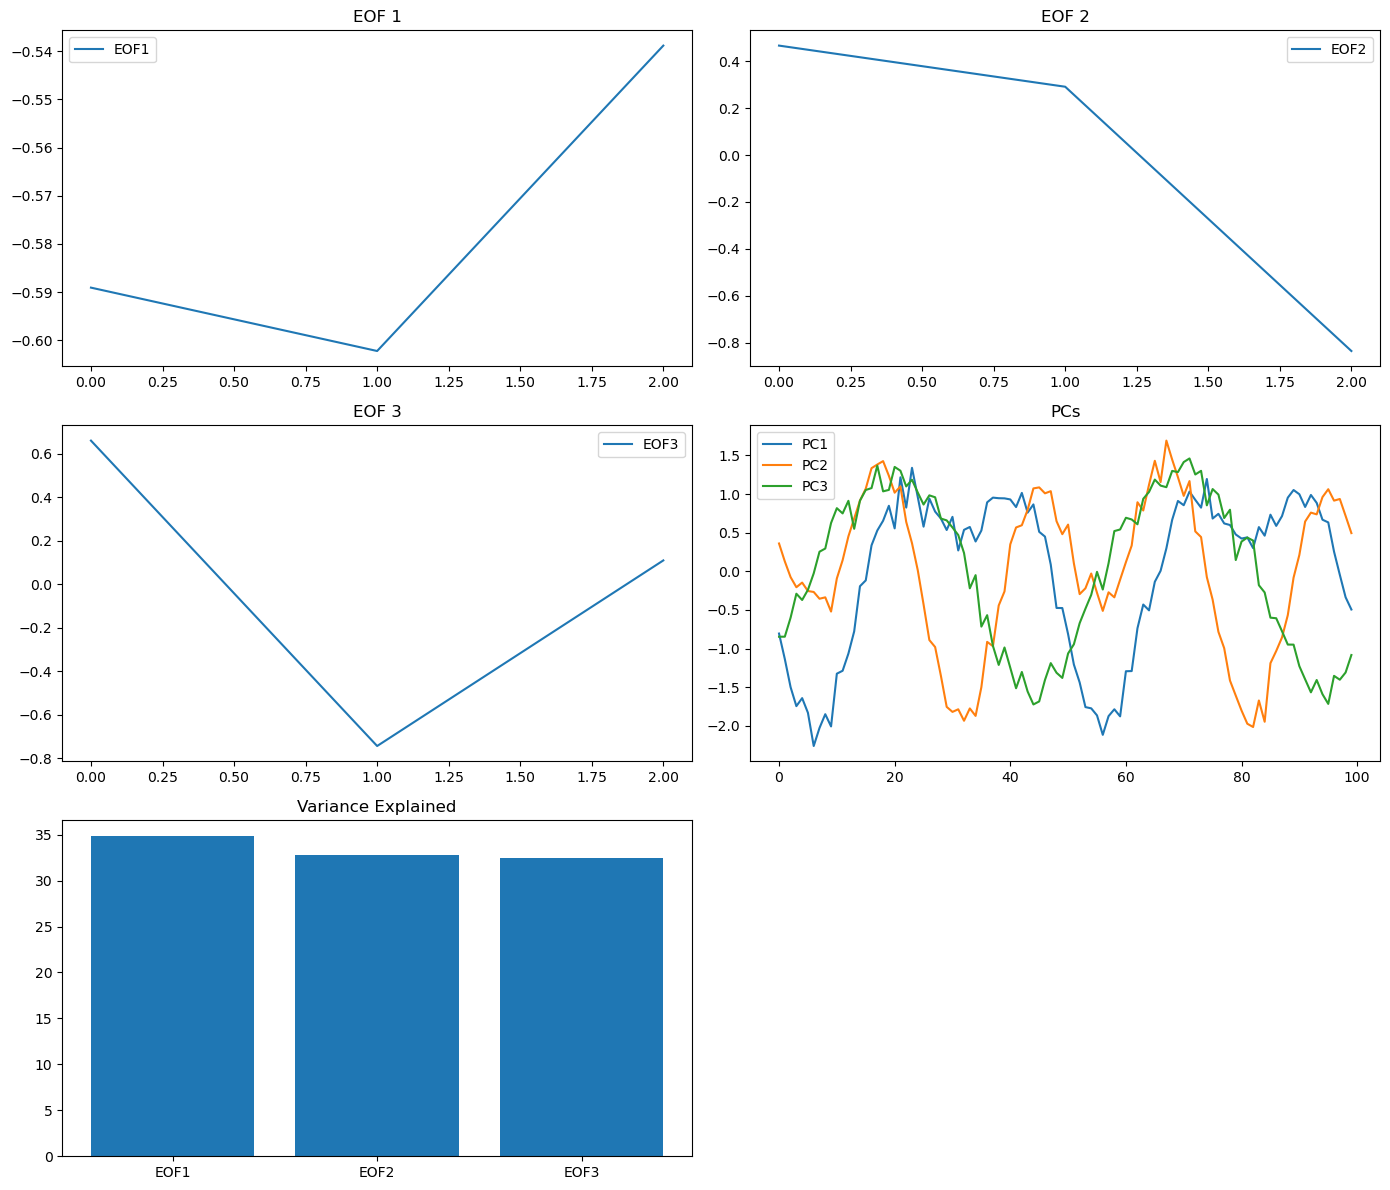

In [20]:
# Plot the EOFs and PCs
plt.figure(figsize=(14, 12))

# Plot EOFs
for i in range(eofs.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.plot(eofs[:, i], label=f'EOF{i+1}')
    plt.title(f'EOF {i+1}')
    plt.legend()

# Plot PCs
plt.subplot(3, 2, eofs.shape[1]+1)
for i in range(pcs.shape[0]):
    plt.plot(time, pcs[i, :], label=f'PC{i+1}')
plt.title('PCs')
plt.legend()

# Plot variance explained
plt.subplot(3, 2, eofs.shape[1]+2)
plt.bar([f'EOF{i+1}' for i in range(len(variance_explained))], variance_explained)
plt.title('Variance Explained')

plt.tight_layout()
plt.show()